# Unemployment in Paris

Here I will work with unemployment rate in Paris, Paris region (Ile-de-France) and metropolitan France (it means without overseas departments like Reunion). For this purpose, I downloaded three datasets which contains quarterly unemployment rate from 1982 till 2016 (though it is possible to download data for 2017, I don't included it). Here are links for download:
* Paris: https://www.insee.fr/fr/statistiques/serie/001515940#Telechargement
* Ile-de-France: https://www.insee.fr/fr/statistiques/serie/001515843#Telechargement
* France: https://www.insee.fr/fr/statistiques/serie/001515842#Telechargement

After download, files are renamed into 'paris.csv', 'idf.csv', 'france.csv'.

The goal of this study is to explore evolution of unemployment rate in Paris, french capital, Ile-de-France, the wealthiest region of France, which represents about 1/3 of GDP of France and metropolitan France

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df_p = pd.read_csv('paris.csv', header = None, sep = ';', usecols = [0, 1], names = ['Date', 'Paris'], skiprows = 3)
df_i = pd.read_csv('idf.csv', header = None, sep = ';', usecols = [0, 1], names = ['Date', 'Ile-de-France'], skiprows = 3)
df_f = pd.read_csv('france.csv', header = None, sep = ';', usecols = [0, 1], names = ['Date', 'France'], skiprows = 3)
df = df_p.merge(df_i.merge(df_f, how = 'inner', on = 'Date'), how = 'inner', on = 'Date')
df['Date'] = pd.to_datetime(df['Date'].str[0:4] + 'Q' + df['Date'].str[-1])
df = df.set_index('Date')
df.head()

Paris  Ile-de-France  France
Date                                    
2016-10-01    7.8            8.6     9.7
2016-07-01    7.8            8.6     9.7
2016-04-01    7.7            8.6     9.7
2016-01-01    7.9            8.8     9.9
2015-10-01    8.0            8.7     9.9

In [13]:
#descriptive statistics
df.describe()

Paris  Ile-de-France      France
count  140.000000     140.000000  140.000000
mean     8.392857       7.667143    8.685714
std      1.000981       1.095999    1.036844
min      6.000000       5.300000    6.400000
25%      7.875000       6.800000    7.975000
50%      8.300000       7.800000    8.600000
75%      9.300000       8.700000    9.700000
max     10.100000       9.300000   10.400000

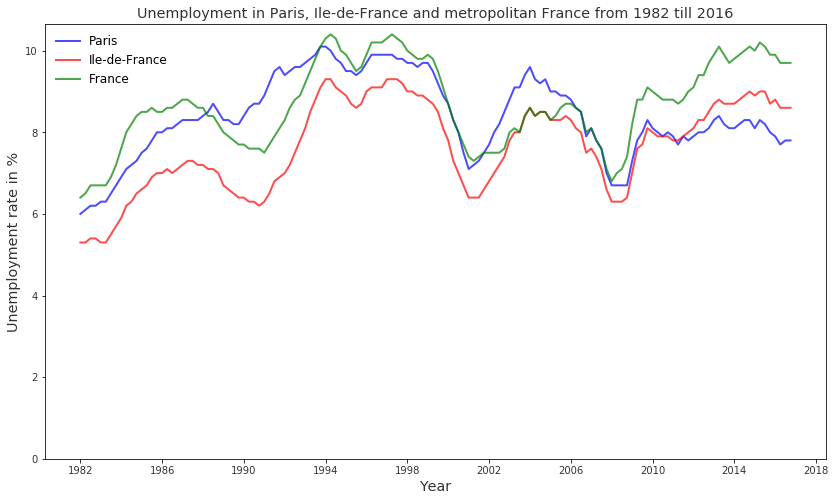

In [16]:
# plotting
plt.figure(figsize = (14, 8))
plt.plot(df['Paris'], color = 'blue', lw = 2, alpha = 0.7)
plt.plot(df['Ile-de-France'], color = 'red', lw = 2, alpha = 0.7)
plt.plot(df['France'], color = 'green', lw = 2, alpha = 0.7)
plt.title('Unemployment in Paris, Ile-de-France and metropolitan France from 1982 till 2016', fontsize = 'x-large', alpha = 0.8)
plt.xticks(alpha = 0.8)
plt.yticks(alpha = 0.8)
plt.xlabel('Year', fontsize = 'x-large', alpha = 0.8)
plt.ylabel('Unemployment rate in %', fontsize = 'x-large', alpha = 0.8)
plt.ylim(ymin = 0)
plt.legend(loc = 2, labels = df.columns, fontsize = 'large', frameon = False)
plt.show()

## Conclusion

First of all we see that unemployment rate has the same tendance for Paris, Ile-de-France region and metropolitan France. It means, that if unemployment rate increases / decreases, it increases / decreases everywhere, we don't observe periodes larger than one quarter, when unemployment increases in France, but decreases in Paris for example. Nevertheless, though unemployment increases and decreases simultaneously, we observe that these changes may differ, it means, for example, that if unployment in Paris slightly increases, in France it might increase drastically.

We see that almost all time of observations, metropolitan France has the highest unemployment, and if we would take into account metropolitan France without Ile-de-France, difference in unemployment would be even more important. We see, that unemployment is always equal or higher in France than in Ile-de-France.

Finally, it is interesting, that Paris has rather high unemployment rate, and in the beginning of 90's and 2000's it was even higher than in France. But today the lowest rate is in Paris. Why is it so? One of the most important reason is the process of gentrification, prices have become too high for poor and unemployed, so they had to move in suburbs.